In [95]:
#!pip install opencv-python

In [96]:
import pathlib


path=str(pathlib.Path().resolve())+"/Imagenes"

In [97]:
import numpy as np
import cv2 as cv

#image = cv.imread(path + "test.png")
#cv2.imshow('img', image)
#cv2.waitKey(0)

(512, 512, 3)


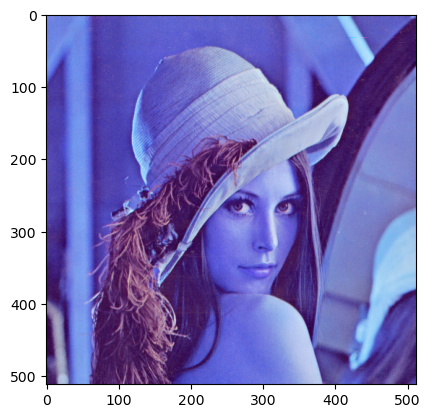

In [98]:
from genericpath import exists
from matplotlib import pyplot as plt


src = cv.imread((path+"/test.png"))
print(src.shape)
plt.imshow(src)

In [99]:
src.shape
src.size
src.dtype

dtype('uint8')

Text(0.5, 1.0, 'B')

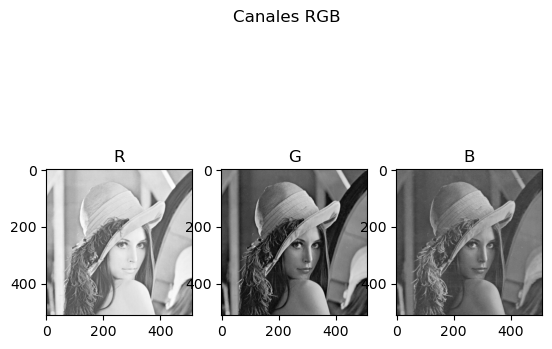

In [100]:
b,g,r = cv.split(src)       # DIVIDE LAS TONALIDADES
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Canales RGB")
ax1.imshow(r, cmap="gray", vmin=0, vmax=255)    # LE DICES QUE COLOR MÍNIMO ES 0 y MÁXIMO 255 PARA QUE NO LO CALCULE EL
ax1.set_title("R")
ax2.imshow(g, cmap="gray", vmin=0, vmax=255)
ax2.set_title("G")
ax3.imshow(b, cmap="gray", vmin=0, vmax=255)
ax3.set_title("B")

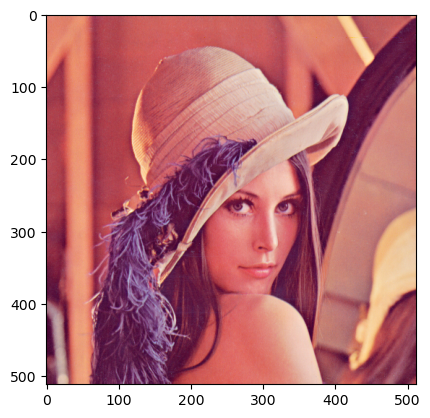

In [101]:
merged = cv.merge([r,g,b])
plt.imshow(merged)

H min: 0  H max: 179  H media: 92.25908279418945
S min: 5  S max: 246  S media: 133.30436325073242
V min: 59  V max: 255  V media: 180.43065643310547


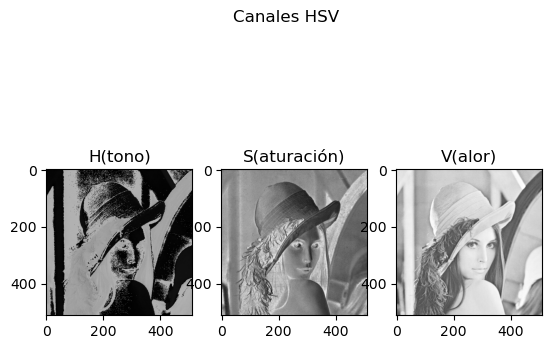

In [102]:
src = cv.cvtColor(src, cv.COLOR_BGR2HSV)
#h,s,v = cv.split(src)
h = src[:, :, 0]
s = src[:, :, 1]
v = src[:, :, 2]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Canales HSV")
ax1.imshow(h, cmap="gray", vmin=0, vmax=255)
ax1.set_title("H(tono)")
ax2.imshow(s, cmap="gray", vmin=0, vmax=255)
ax2.set_title("S(aturación)")
ax3.imshow(v, cmap="gray", vmin=0, vmax=255)
ax3.set_title("V(alor)")
print(f"H min: {h.min()}  H max: {h.max()}  H media: {h.mean()}")
print(f"S min: {s.min()}  S max: {s.max()}  S media: {s.mean()}")
print(f"V min: {v.min()}  V max: {v.max()}  V media: {v.mean()}")

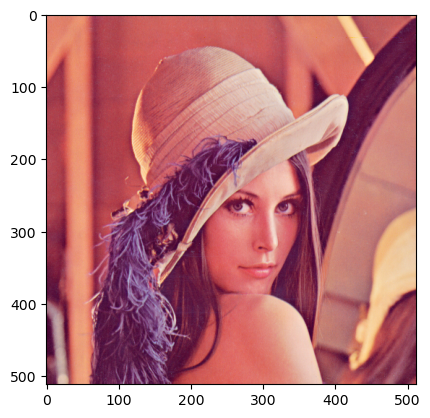

In [103]:
src = cv.imread(path + "/test.png")
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
plt.imshow(src)

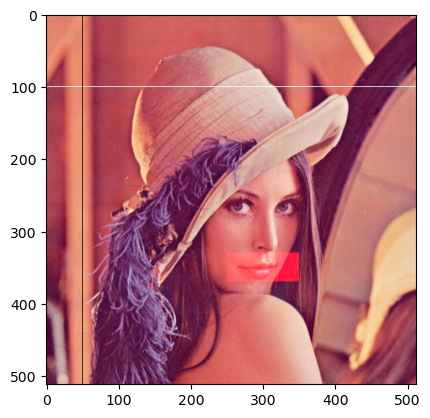

In [104]:
# Vamos hacer una línea blanca que atraviese toda la foto de la chica

# Método menos óptimo
from pickletools import uint8


for i in range(src.shape[1]):
  src[100, i] = [255, 255, 255]
plt.imshow(src)

# Línea en negro vertical
src[:, 50, :] = [0,0,0]
plt.imshow(src)

# Zona resaltada en rojo en esas coordenadas
src[330:370,250:350,0] = np.full((40, 100), 255, dtype=np.uint8)

boca = src[330:370, 250:350]
plt.imshow(src)

Mínimo:25.0, Máximo:245.0, MinLoc(508, 71), MaxLoc:(116, 273)
Media: [[124.0485611]] DesStd: [[47.85559963]]


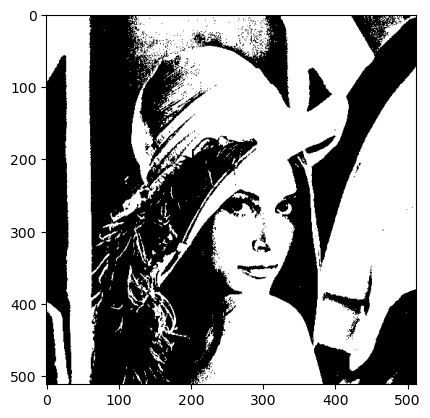

In [105]:
src = cv.imread(path + "/test.png")
src = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

min,max,minloc,maxloc = cv.minMaxLoc(src)
print(f"Mínimo:{min}, Máximo:{max}, MinLoc{minloc}, MaxLoc:{maxloc}")


# Istograma, la media dice si la foto es clara o oscura, 
means, stddev = cv.meanStdDev(src)
print((f"Media: {means} DesStd: {stddev}"))


#bianrizando
src[np.where(src < means)] = 0
src[np.where(src >= means)] = 255

plt.imshow(src, cmap="gray")


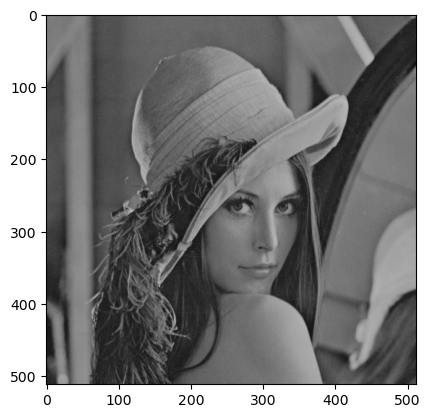

In [137]:
# Normalizar valores a float para hacer operaciones
src = cv.imread(path+"/test.png")
src = cv.cvtColor(src,cv.COLOR_BGR2GRAY)

gris = np.float32(src)
destino = np.zeros(gris.shape,dtype=np.float32)
#ret = cv.normalize(gris, dst=destino, alpha=100, beta=50, norm_type = cv.NORM_MINMAX)

# SI SE USA ESTE DESTINO TIENE QUE SER * 255
#ret = cv.normalize(gris, dst=destino, alpha=1, beta=0, norm_type = cv.NORM_MINMAX)
#ret = cv.normalize(gris, dst=destino, alpha=1, beta=100, norm_type = cv.NORM_INF)
# TIENE QUE USAESE CON VALOR MUY ALTO
ret = cv.normalize(gris, dst=destino, alpha=1, beta=100, norm_type = cv.NORM_L1)

plt.imshow(destino*25500000, cmap="gray", vmin=0, vmax=255)